# Diagnóstico médico binario - Logistic regression

### Estudiante: Rebeca Justiniano Saravia

Dataset con variables:
- glucosa
- presión arterial
- IMC
- edad
- resultado (0 = no diabético, 1 = diabético)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('datasets/dataset_regresion_logistica.csv')
data.head()

,glucosa,presion,IMC,edad,diabetico
0,85,70,22,25,0
1,140,90,31,50,1
2,95,85,25,35,0
3,130,88,29,45,1
4,160,95,34,60,1


In [6]:
X = data[['glucosa', 'presion', 'IMC', 'edad']]
y = data['diabetico']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Balancear clases (undersampling/oversampling)

In [8]:
# 1. Inicializar SMOTE
# random_state asegura que los resultados sean reproducibles
sm = SMOTE(random_state=42)

# 2. Aplicar SMOTE para generar muestras sintéticas
# Los nuevos sets balanceados se llamarán X_res y y_res
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## 2. Entrenar regresión logística

In [9]:
# 1. Inicializar el modelo (ej. Regresión Logística)
model = LogisticRegression(solver='liblinear', random_state=42)

# 2. Entrenar el modelo con los datos balanceados por SMOTE
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

## 3. Dibujar curva ROC y calcular AUC

In [10]:
# Obtener las probabilidades de la clase positiva (clase 1)
y_score = model.predict_proba(X_test)[:, 1]

# 1. Calcular FPR, TPR y umbrales (thresholds)
# Los arrays resultantes se usan para trazar la curva
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# 2. Calcular el Área Bajo la Curva (AUC)
roc_auc = auc(fpr, tpr)


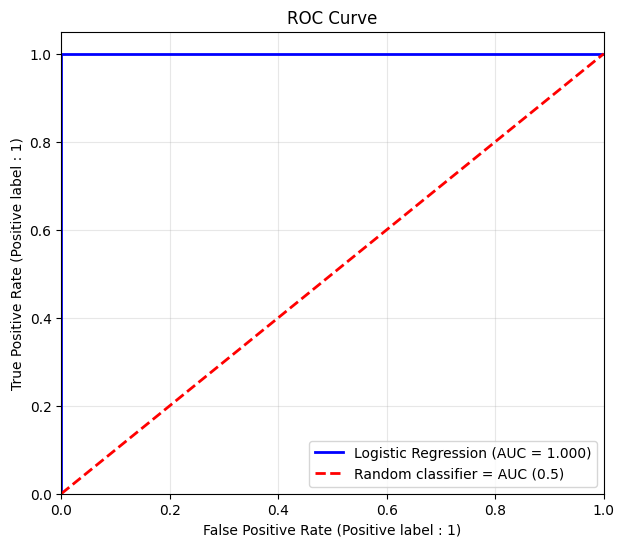

In [11]:
# Plot ROC curve and random-classifier baseline
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random classifier = AUC (0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Positive label : 1)')
plt.ylabel('True Positive Rate (Positive label : 1)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## 4. Evaluar impacto del umbral de clasificación

In [20]:
def evaluar_umbral(umbral, y_true, y_proba):
    # Aplicar el umbral para obtener las predicciones binarias
    y_pred = (y_proba >= umbral).astype(int)
    
    print(f"--- Evaluación con Umbral: {umbral:.2f} ---")
    
    # Imprimir Reporte de Clasificación (incluye Precision, Recall, F1)
    print("Reporte de Clasificación:")
    print(classification_report(y_true, y_pred, zero_division=1))
    
    # Imprimir Matriz de Confusión
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))

In [21]:
evaluar_umbral(0.4, y_test, y_score)

--- Evaluación con Umbral: 0.40 ---
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2


Matriz de Confusión:
[[0 1]
 [0 1]]


In [16]:
evaluar_umbral(0.5, y_test, y_score)

--- Evaluación con Umbral: 0.50 ---
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Matriz de Confusión:
[[1 0]
 [0 1]]


El modelo mejora su predicción a partir de un umbral de 0.5